
## [Neural Network 4] 나만의 퍼셉트론을 만들어보자

https://www.youtube.com/watch?v=YODTXF9OIiw&list=PLfGJDDf2OqlSAL9kE4FvT_rG4DH_8S4AQ&index=10


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
def step_function(x):
    if x < thres:
        return 0
    else:
        return 1

In [3]:
def get_training_data(data_point):
    x1 = np.random.random(data_point)
    x2 = np.random.random(data_point)
    y = ((x1 + x2) > 1).astype(int)
    training_set = [ ((x1[i],x2[i]), y[i]) for i in range(len(x1))]

    return training_set # list[tuple[float,float], int]

# 참고: 리턴되는 training_set 은 np.array 가 아니고 그냥 파이썬의 리스트형 이다.
#      처음에 만든 x1,x2,y 는 모두 (100,) 의 1D 벡터인데, 이걸 재활용하지 않고 추가로 set을 만들었음.

In [4]:
thres = 0.5  # threshold
w = np.array([0.3, 0.9]) # weight, shape (2,)
lr = 0.1  # learning rate
data_point = 100  # number of input samples
epoch = 5
training_set = get_training_data(data_point)


In [5]:
print(type(training_set))
training_set[0:5]

<class 'list'>


[((0.9057851994566193, 0.03880899261310766), 0),
 ((0.10191989424088455, 0.4183451060714314), 0),
 ((0.4571305285657107, 0.5706167617312526), 1),
 ((0.09030743569232336, 0.9088307476784), 0),
 ((0.841887513072259, 0.8846615717702738), 1)]

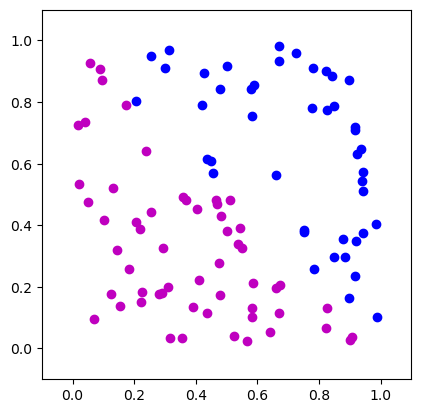

In [6]:
# 새로운 그림(figure)을 생성합니다. 숫자 '0'은 figure의 ID를 지정하며,
# 여러 개의 figure를 사용할 때 구분하기 위해 사용됩니다.
# 만약 이미 ID가 0인 figure가 있다면 그것을 재사용합니다.
plt.figure(0)

# y, x축의 표시 범위를 설정합니다. 여기서는 -0.1부터 1.1까지로 제한합니다.
# 데이터가 이 범위 안에 있도록 보장하거나 시각적으로 보기 좋게 조정하는 데 사용됩니다.
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)

# 현재 활성화된 축(axes)을 가져옵니다. 'gca'는 "get current axes"의 약자입니다.
# ax 객체를 통해 축의 속성을 더 세밀하게 조정할 수 있습니다.
ax = plt.gca()  # get the current axes

# 축의 종횡비(aspect ratio)를 설정합니다.
# 'equal'은 x축과 y축의 스케일을 동일하게 만들어 데이터가 왜곡되지 않도록 합니다.
# adjustable='box'는 축의 범위를 유지하면서 종횡비를 조정하도록 설정합니다.
ax.set_aspect('equal', adjustable='box')

for x,y in training_set:
    if y == 1:
        # plt.plot(x[0],x[1], 'bo')
        plt.scatter(x[0],x[1], c='b', marker='o')  # 파란색 원
    else:
        # plt.plot(x[0],x[1], 'go')
        plt.scatter(x[0],x[1], c='m', marker='o')
plt.show()


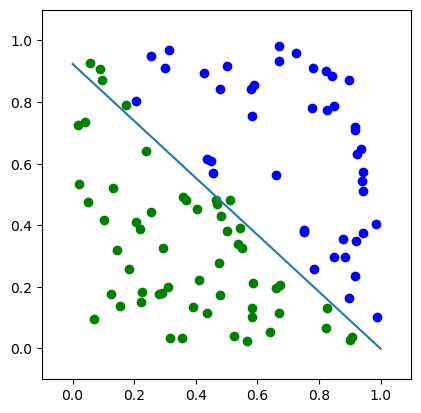

epoch 4, cnt 100, w [0.54143296 0.5004912 ]


In [ ]:
%matplotlib inline

from time import sleep

# 같은 0 을 사용했으니, 아마도 앞에 표시된 그림을 재사용할 것으로 보인다.
plt.figure(0)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

xx = np.linspace(0,1,50)
for i in range(epoch):
    cnt = 0
    for x,y in training_set:
        clear_output(wait=True)

        # 일종의 feed_forward를 수행하는 것이다. u는 출력 결과.
        u = sum(x*w)
        # x는 training set 중 입력 데이터로서 파이썬의 튜플 타입이고 shape 이 (2,) 이다.
        # w는 np.array 이고 shape 은 (2,)라서, 두 shape이 동일하니 산술 곱셈이 된다.

        # 오차를 구함. (정답 - 출력값)
        error = y - step_function(u)

        # 오차가 >0 이면 u가 y보다 작다는 것이므로 w를 더 키워야 하고
        # 오차가 <0 이면 u가 더 크다는 것이니 w를 감소시켜야 할 것이다.
        # 이는 error 부호에 따라 알아서 이루어진다.
        for index, value in enumerate(x):
            w[index] = w[index] + (lr * error * value)

        # 한 레코드 training 마다 지금까지의 train 된 데이터를 그래프에 표시
        for xs, ys in training_set[0:cnt]:
            plt.ylim(-0.1, 1.1)
            plt.xlim(-0.1, 1.1)
            ax = plt.gca()
            ax.set_aspect('equal', adjustable='box')

            plt.plot(xs[0], xs[1], 'bo' if ys == 1 else 'go')

        # 지금까지 찾아진 w의 의미를 1차 함수 직선으로 표시.
        yy = -w[1]/w[0] * xx + thres/w[0]  # <== w[0]*yy + w[1]*yy = thres

        plt.plot(xx,yy)
        plt.show()
        cnt = cnt+1
        print(f'epoch {i}, cnt {cnt}, w {w}')
        sleep(0.002)




### 부록: ndarray 실습

In [8]:
# test
# tw = [ 0.1, 0.5 ]
nw = np.array([1, 2, 3]) # weight, shape (2,)
print(nw * (3, 4, 5))

# nw 가 그냥 파이썬 리스트 였다면 에러 발생.
#   TypeError: can't multiply sequence by non-int of type 'list'
try:
    print([3, 4] * (3, 4))
except Exception as e:
    print(e)

# 리스트를 곱하는 경우
print(nw * [3, 4, 5])
# [ 3  8 15]

# 순서가 바뀌어도
print([3, 4, 5] * nw)
# [ 3  8 15]

# 개수가 적다면? (3,3) 으로 확장된 후 연산됨. (이걸 broadcast 라고 부르던가?)
# shape 중 1 인 경우에 지원이 됨.
print(nw * (3,))
# [3 6 9]

try:
    print(nw * (3,4)) # shape 이 1이 아닌 axis가 있다면 broadcast 안되므로 shape 이 정확히 같아야 함.
except Exception as e:
    print(e)
# operands could not be broadcast together with shapes (2,) (3,)

# ndarray 와 ndarray 도 상관 없음.
print(nw * np.array(5))  # (3,) 과 () 의 연산
# [ 5 10 15]
print(nw * np.array([3])) # (3,) 과 (1,) 의 연산
# [3 6 9]

[ 3  8 15]
can't multiply sequence by non-int of type 'tuple'
[ 3  8 15]
[ 3  8 15]
[3 6 9]
operands could not be broadcast together with shapes (3,) (2,) 
[ 5 10 15]
[3 6 9]
